In [97]:
import matplotlib.pyplot as plt
import numpy as np
import librosa, librosa.display

def plot(C, sr, fmin=librosa.note_to_hz('A0')):
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max), sr=sr, x_axis='time', y_axis='cqt_note', ax=ax, fmin=fmin)
    ax.set_title('Constant-Q power spectrum')
    fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [98]:
y, sr = librosa.load(librosa.ex('trumpet'))
print(y.shape)

(117601,)


(84, 230)


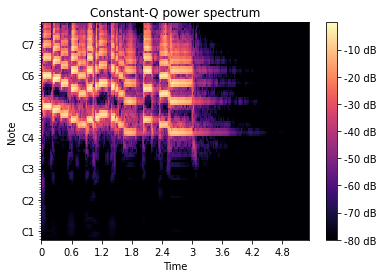

In [99]:
C = np.abs(librosa.cqt(y, sr=sr))
print(C.shape)
C
plot(C, sr)

(88, 230)


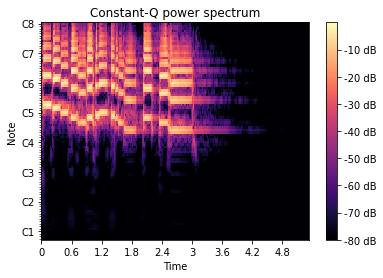

In [100]:
C = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('A0'), n_bins=88))
print(C.shape)
C
plot(C, sr)

(40, 230)


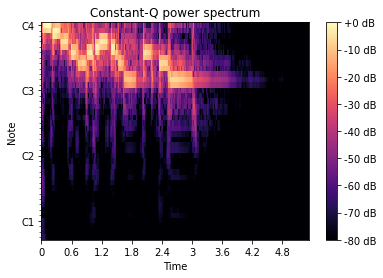

In [105]:
C = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('C2'), n_bins=40, bins_per_octave=12))
print(C.shape)
C
plot(C, sr)

(40, 230)


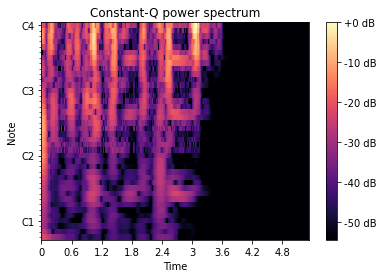

In [106]:
scaler = 2
C = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('C2'), n_bins=40, bins_per_octave=12*scaler))
print(C.shape)
C
plot(C, sr)

(40, 460)


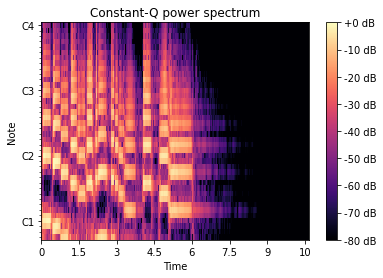

In [103]:
C = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('C5'), n_bins=40, bins_per_octave=12, hop_length=256))
print(C.shape)
C
plot(C, sr)

C:\Users\Zoilo\AppData\Local\Temp/ipykernel_16232/2217745838.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max)[idx],
C:\Users\Zoilo\AppData\Local\Temp/ipykernel_16232/2217745838.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  librosa.display.specshow(chroma_orig[idx], y_axis='chroma')


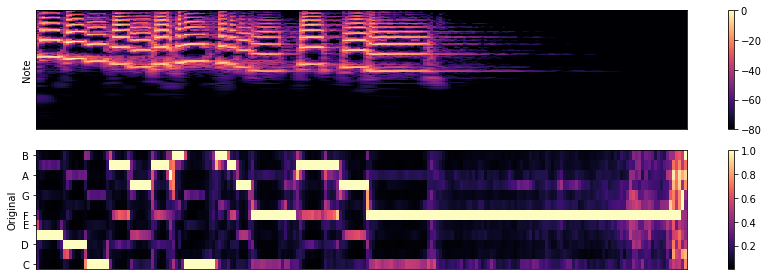

In [109]:
chroma_orig = librosa.feature.chroma_cqt(y=y, sr=sr)

# For display purposes, let's zoom in on a 15-second chunk from the middle of the song
idx = [slice(None), slice(*list(librosa.time_to_frames([0, 5])))]

# And for comparison, we'll show the CQT matrix as well.
C = np.abs(librosa.cqt(y=y, sr=sr, bins_per_octave=12*3, n_bins=7*12*3))


plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max)[idx], y_axis='cqt_note', bins_per_octave=12*3)
plt.colorbar()

plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_orig[idx], y_axis='chroma')
plt.colorbar()
plt.ylabel('Original')

plt.tight_layout()

C:\Users\Zoilo\AppData\Local\Temp/ipykernel_16232/4076337921.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  librosa.display.specshow(chroma_orig[idx], y_axis='chroma')
C:\Users\Zoilo\AppData\Local\Temp/ipykernel_16232/4076337921.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  librosa.display.specshow(chroma_os[idx], y_axis='chroma', x_axis='time')


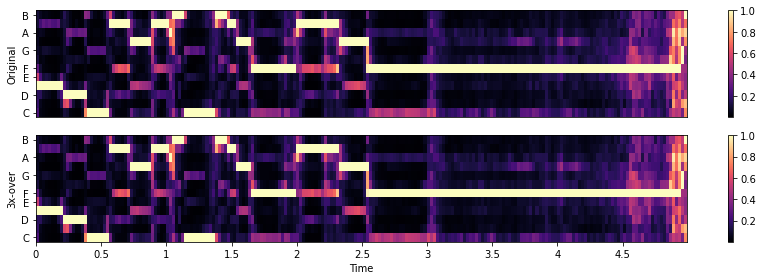

In [110]:
chroma_os = librosa.feature.chroma_cqt(y=y, sr=sr, bins_per_octave=12*3)


plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_orig[idx], y_axis='chroma')
plt.colorbar()
plt.ylabel('Original')

plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_os[idx], y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('3x-over')

plt.tight_layout()